In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 6,4

In [4]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
df_mean.head()

,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [5]:
df_resample = df_mean.resample("M").mean()
df_resample.head()

,Price,CO2E_EMISSIONS_FACTOR
2009-07-31,27.446231,0.712181
2009-08-31,22.771027,0.746957
2009-09-30,27.074297,0.714911
2009-10-31,27.976296,0.643430
2009-11-30,197.206615,0.638268


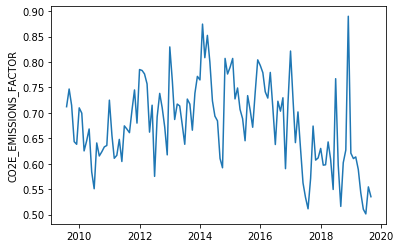

In [7]:
plt.figure(figsize=(6,4))
sns.lineplot(df_resample.index, df_resample.CO2E_EMISSIONS_FACTOR);

file_path = '{}/Desktop/Portfolio_project/presentation/CO2_over_all_year.png'.format(os.environ['HOME'])
plt.savefig(file_path)

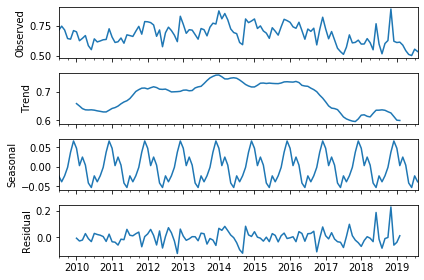

In [11]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='additive')
result.plot();

In [12]:
result.seasonal

2009-07-31   -0.023658
2009-08-31   -0.038803
2009-09-30   -0.023406
2009-10-31   -0.001685
2009-11-30    0.037486
                ...   
2019-04-30    0.004089
2019-05-31   -0.042050
2019-06-30   -0.053612
2019-07-31   -0.023658
2019-08-31   -0.038803
Freq: M, Name: CO2E_EMISSIONS_FACTOR, Length: 122, dtype: float64

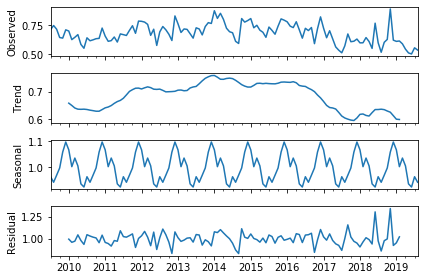

In [13]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='multiplicative')
result.plot();

In [1]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [18]:
#lambda = 129,600 for monthly data
#lambda = 1600 for qarterly data
#lambda = 6.25 for yearly data
gdp_cycle, gdp_trend = hpfilter(result.trend.dropna(), lamb = 129600)

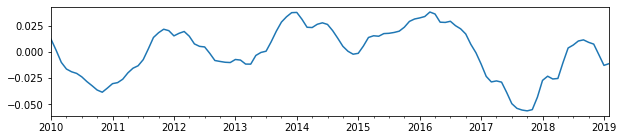

In [19]:
fig = gdp_cycle.plot(figsize=(10,2))

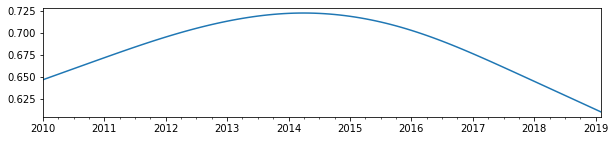

In [20]:
fig = gdp_trend.plot(figsize=(10,2))